## ARIMA Model

Passing dynamic=False means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing typ='levels' predicts the levels of the original endogenous variables. If we'd used the default typ='linear' we would have seen linear predictions in terms of the differenced endogenous variables.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

ARIMA Mean Squared Error: 311.39969788105327
ARIMA Root Mean Squared Error: 17.64652084352758
Price Mean: 163.1156708
Prediction Price Mean: 311.0610724


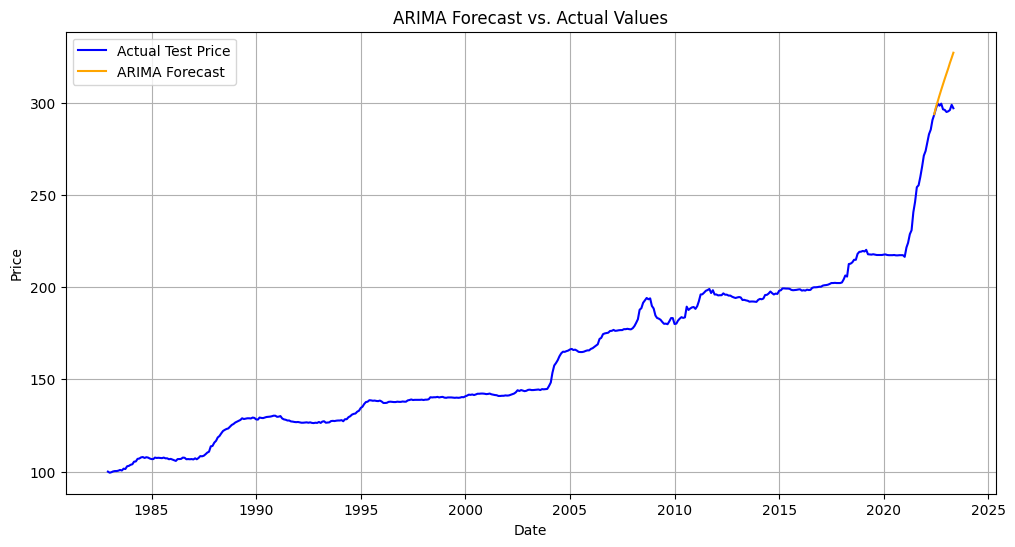

In [1]:
Path = 'Sheet_metal_mng.csv'



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pmdarima import auto_arima # for determining ARIMA orders
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from sklearn.metrics import mean_squared_error
import math

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load specific forecasting tools



df = pd.read_csv(Path,index_col='Date',parse_dates=True)
df.index.freq = 'MS'

train = df.iloc[:-12]  # All except the last 12 rows
test = df.iloc[-12:]   # Last 12 rows for testing

# import random
# ARIMA Model
def arima_forecast(train_series):
    model = auto_arima(train_series,seasonal=True)
    order = model.order
    model = ARIMA(train_series, order=order)
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=len(test))
    return forecast

# Call ARIMA function
arima_predictions = arima_forecast(train['Price'])

# Calculate ARIMA MSE and RMSE
arima_mse = mean_squared_error(test['Price'], arima_predictions)
arima_rmse = np.sqrt(arima_mse)

print("ARIMA Mean Squared Error:", arima_mse)
print("ARIMA Root Mean Squared Error:", arima_rmse)
print(f'Price Mean: {df.Price.mean():11.10}')
print(f'Prediction Price Mean: {arima_predictions.mean():11.10}')

# Plotting the ARIMA forecast and actual test values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price'], color='blue', label='Actual Test Price')  # Plotting actual values
plt.plot(arima_predictions.index, arima_predictions, color='orange', label='ARIMA Forecast')  # Plotting ARIMA forecast
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs. Actual Values')
plt.legend()
plt.grid()
plt.show()

In [15]:
model = auto_arima(train['Price'],seasonal=True)
order = model.order
order

(2, 2, 1)